# Testing Assumptions
## 1. State Assumptions

The following are our assumptions:
* Unmasked is independent of weighted number of  synapses
* Weighted number of synapses is independent of $X$ and $Y$
* Bins are i.i.d.
* Grid means are i.i.d.
* Class conditional difference between layers

## 2. Check Assumptions

For testing unmasked is independent of weighted number of synapses, check the off diagonal covariance is approximately 0 or use the scatter plo
t to see the trend.  
$\#\text{{weighted}} \perp\!\!\!\perp  \#\text{{unmasked}}$
  
For testing weighted number of sympses is independent of $X$ and $Y$, repeat the above steps.   
$\#\text{{weighted}} \perp\!\!\!\perp  X_i$  
$\#\text{{weighted}} \perp\!\!\!\perp  Y_i$

For testing bins and grid means are iid, check the off diagonal and optimal number of clusters.    
$u_i\overset{iid}{\sim}F$, where $u_i$ is the bins.  
$(u_1, u_2, ..., u_n) {\sim} F = \displaystyle\Pi_{i=1}^{n} F_i$
$ F_i = F_j, \forall i \neq j$  

$F = \Pi_{j = 1}^{J} F_j, J < n, \text{      } \Pi_{j=1}^{J}\omega_jF_j(\theta)$

For testing grid means are iid, repeat the above steps.  
$w_i\overset{iid}{\sim}F$, where $w_i$ is the grid means.  
$(w_1, w_2, ..., w_n) {\sim} F = \displaystyle\Pi_{i=1}^{n} F_i$
$ F_i = F_j, \forall i \neq j$  

$F = \Pi_{j = 1}^{J} F_j, J < n, \text{      } \Pi_{j=1}^{J}\omega_jF_j(\theta)$

For conditional differences between layers, fit the model using least squares regression and check the residual plot.  
$y = \beta x + \epsilon, \epsilon {\sim}Normal(\mu, \epsilon)$
$\|y - \beta x\| - \epsilon {\sim} Normal(\mu, \epsilon), p_1 \neq p_2$ 


In [4]:
# Import packages
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import sklearn.mixture
import scipy.stats as ss

np.random.seed(12345678)  # for reproducibility, set random seed

# Read in data
df = pd.read_csv('../output.csv')

nvox = 64*64*48 # assume number of voxels per bin
df['weighted'] = df['synapses']/df['unmasked']*nvox

### a. Bin data from Assignment 4
#### i. Independence assumption of unmasked vs. weighted data

#### ii. Independence assumption of weighted data

In [31]:
dfthr = df[df['unmasked'] > nvox * 0.5]
Zvalue = np.unique(dfthr['cz'])
minlen = 100000

for i in Zvalue:
    temp = len(dfthr[dfthr['cz'] == i])
    if temp < minlen:
        minlen = temp

for i in Zvalue:
    if i == 55:
        temp = dfthr[dfthr['cz'] == i]['weighted']
        out = np.random.choice(temp, minlen)
    else :
        temp = dfthr[dfthr['cz'] == i]['weighted']
        sample = np.random.choice(temp, minlen)
        out = np.column_stack((out, sample))

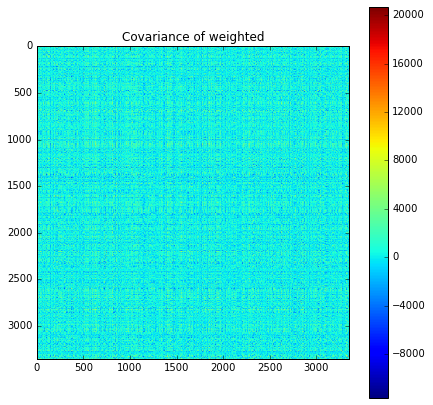

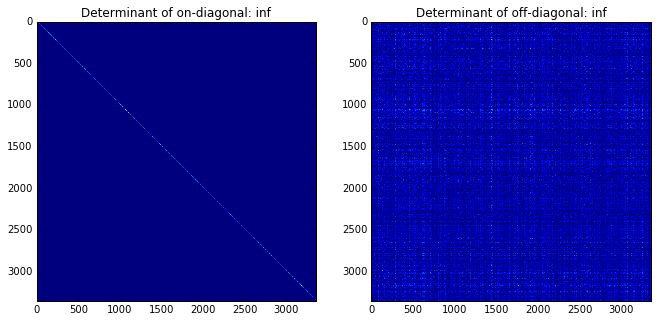

Ratio of on- and off-diagonal determinants: nan


In [32]:
covar = np.cov(out)

plt.figure(figsize=(7,7))
plt.imshow(covar)
plt.title('Covariance of weighted data')
plt.colorbar()
plt.show()

diag = covar.diagonal() * np.eye(covar.shape[0])
hollow = covar - diag
d_det = np.linalg.det(diag)
h_det = np.linalg.det(hollow)

plt.figure(figsize=(11, 8))
plt.subplot(121)
plt.imshow(diag)
plt.clim([0, np.max(covar)])
plt.title('Determinant of on-diagonal: ' + str(d_det))
plt.subplot(122)
plt.imshow(hollow)
plt.clim([0, np.max(covar)])
plt.title('Determinant of off-diagonal: ' + str(h_det))
plt.show()

print "Ratio of on- and off-diagonal determinants: " + str(d_det / h_det)

Clearly from the result we know that the weighted data is not independent because it does not have 0 on off-diagonal.

#### iii. Identically distributed assumption of weighted data

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Fitting and evaluating model with 1 clusters.
Fitting and evaluating model with 2 clusters.
Fitting and evaluating model with 3 clusters.
Fitting and evaluating model with 4 clusters.
Fitting and evaluating model with 5 clusters.
Fitting and evaluating model with 6 clusters.
Fitting and evaluating model with 7 clusters.
Fitting and evaluating model with 8 clusters.
Fitting and evaluating model with 9 clusters.
Fitting and evaluating model with 10 clusters.
Fitting and evaluating model with 11 clusters.
Fitting and evaluating model with 12 clusters.
Fitting and evaluating model with 13 clusters.
Fitting and evaluating model with 14 clusters.
Fitting and evaluating model with 15 clusters.


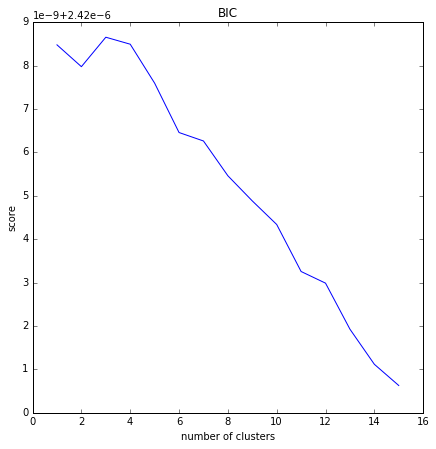

[ 411780.51201155  411865.80436545  411750.70476701  411778.0306697
  411930.29686779  412123.37715511  412156.44398911  412292.66621506
  412391.14276486  412483.56130337  412668.0130429   412713.66529643
  412894.39622789  413032.37204619  413115.79522721]


In [36]:
import sklearn.mixture
i = np.linspace(1, 15, 15, dtype = 'int')
print i
bic = np.array(())
for idx in i:
    print "Fitting and evaluating model with " + str(idx) + " clusters."
    gmm = sklearn.mixture.GMM(n_components=idx, n_iter=1000, covariance_type = 'diag')
    gmm.fit(out)
    bic = np.append(bic, gmm.bic(out))
plt.figure(figsize=(7, 7))
plt.plot(i, 1.0/bic)
plt.title('BIC')
plt.ylabel('score')
plt.xlabel('number of clusters')
plt.show()
print bic

Since the optimal number of clusters is not 1, we conclude the weighted data is not identical.

### b. Grid data from Assignment 5

In [2]:
import pickle

# Read labels
with open('Z_labels.pickle') as f:
    zvals, labels = pickle.load(f)

# Read grid means
with open('grid_data.pickle') as f:
    grid_means, grid_z = pickle.load(f)

#### i. Independence assumption of grid means and X,Y position

#### ii. Independence assumption of grid means

#### iii. Identically distributed assumption of grid means

#### iv. Class conditional difference assumption between low-density vs. high-density Z layers